# Classifying Heart Disease Data

### Summary 

**Big Picture Summary**: The purpose of this notebook is to develop a machine learning model individuals interested in knowing if they might be at risk of heart disease. The data used in this notebook was explored in the notebook HD_Data_Story.ipynb.

In [45]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# model Building
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# model Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

# importing the dataset
heart_disease = pd.read_csv('/Users/yungreezy/cleveland_.csv')

# making the target variable binary 
heart_disease = heart_disease.replace({'target': {2:1, 3:1, 4:1}})



## Data Processing

Through my EDA, I found that some categorical variables needed both converting into dummy variables and scaling all their values before training the Machine Learning models. The get_dummies method was first used to create dummy columns for categorical variables.

In [16]:
heart_disease.thal.unique()

array([ 6.,  3.,  7., nan])

In [17]:
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [18]:
## dropping rows with missing values 

heart_disease = heart_disease.dropna()

In [19]:
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
categorical_val = []
continous_val = []
for column in heart_disease.columns:
    print('==============================')
    print(f"{column} : {heart_disease[column].unique()}")
    if len(heart_disease[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76]
sex : [1 0]
cp : [1 4 3 2]
trestbps : [145 160 120 130 140 172 150 110 132 117 135 112 105 124 125 142 128 170
 155 104 180 138 108 134 122 115 118 100 200  94 165 102 152 101 126 174
 148 178 158 192 129 144 123 136 146 106 156 154 114 164]
chol : [233 286 229 250 204 236 268 354 254 203 192 294 256 263 199 168 239 275
 266 211 283 284 224 206 219 340 226 247 167 230 335 234 177 276 353 243
 225 302 212 330 175 417 197 198 290 253 172 273 213 305 216 304 188 282
 185 232 326 231 269 267 248 360 258 308 245 270 208 264 321 274 325 235
 257 164 141 252 255 201 222 260 182 303 265 309 307 249 186 341 183 407
 217 288 220 209 227 261 174 281 221 205 240 289 318 298 564 246 322 299
 300 293 277 214 207 160 394 184 315 409 244 195 196 126 313 259 200 262
 215 228 193 271 210 327 149 295 306 178 237 218 223 242 319 166 180 311
 278 342 169 187 157 176 241 131]
f

In [21]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [22]:
categorical_val.remove('target')
dataset = pd.get_dummies(heart_disease, columns = categorical_val)

In [23]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_1,cp_2,...,slope_1,slope_2,slope_3,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63,145,233,150,2.3,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
1,67,160,286,108,1.5,1,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,67,120,229,129,2.6,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,37,130,250,187,3.5,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
4,41,130,204,172,1.4,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0


In [24]:
print(heart_disease.columns)
print(dataset.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_1', 'cp_2', 'cp_3', 'cp_4', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_1', 'slope_2',
       'slope_3', 'ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_3.0',
       'thal_6.0', 'thal_7.0'],
      dtype='object')


In [26]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

## Applying machine learning algorithms

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [28]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

After splitting the data into training and test sets we can build a machine learning model.

We train to find the patterns (on the training set).

And test to apply the patterns (on the test set).

6 different machine learning models will be built and compared:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Support Vector machine
4. Decision Tree Classifier
5. Random Forest Classifier
6. XGBoost Classifier


#### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.99%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.847458   0.876404  0.859903    0.861931      0.860882
recall       0.900901   0.812500  0.859903    0.856700      0.859903
f1-score     0.873362   0.843243  0.859903    0.858303      0.859394
support    111.000000  96.000000  0.859903  207.000000    207.000000
_______________________________________________
Confusion Matrix: 
 [[100  11]
 [ 18  78]]

Test Result:
Accuracy Score: 87.78%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.895833   0.857143  0.877778   0.876488      0.878208
recall      0.877551   0.878049  0.877778   0.877800      0.877778
f1-score    0.886598   0.867470  0.877778   0.877034      0.877884
support    49.000000  41.000000  0.877778  90.000000     90.000000
_____________

In [30]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.990338,87.777778


#### K-nearest neighbors

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 83.57%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.823529   0.852273  0.835749    0.837901      0.836860
recall       0.882883   0.781250  0.835749    0.832066      0.835749
f1-score     0.852174   0.815217  0.835749    0.833696      0.835035
support    111.000000  96.000000  0.835749  207.000000    207.000000
_______________________________________________
Confusion Matrix: 
 [[98 13]
 [21 75]]

Test Result:
Accuracy Score: 88.89%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.867925   0.918919  0.888889   0.893422      0.891155
recall      0.938776   0.829268  0.888889   0.884022      0.888889
f1-score    0.901961   0.871795  0.888889   0.886878      0.888219
support    49.000000  41.000000  0.888889  90.000000     90.000000
_________________

In [32]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.990338,87.777778
1,K-nearest neighbors,83.574879,88.888889


#### Support Vector Machine

In [33]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 92.75%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.913793   0.945055  0.927536    0.929424      0.928291
recall       0.954955   0.895833  0.927536    0.925394      0.927536
f1-score     0.933921   0.919786  0.927536    0.926853      0.927366
support    111.000000  96.000000  0.927536  207.000000    207.000000
_______________________________________________
Confusion Matrix: 
 [[106   5]
 [ 10  86]]

Test Result:
Accuracy Score: 90.00%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.884615   0.921053       0.9   0.902834      0.901215
recall      0.938776   0.853659       0.9   0.896217      0.900000
f1-score    0.910891   0.886076       0.9   0.898484      0.899586
support    49.000000  41.000000       0.9  90.000000     90.000000
_____________

In [34]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.990338,87.777778
1,K-nearest neighbors,83.574879,88.888889
2,Support Vector Machine,92.753623,90.000000


#### Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    111.0  96.0       1.0      207.0         207.0
_______________________________________________
Confusion Matrix: 
 [[111   0]
 [  0  96]]

Test Result:
Accuracy Score: 70.00%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.739130   0.659091       0.7   0.699111      0.702668
recall      0.693878   0.707317       0.7   0.700597      0.700000
f1-score    0.715789   0.682353       0.7   0.699071      0.700557
support    49.000000  41.000000       0.7  90.000000     90.000000
_______________________________________________
Confusion Matrix: 


In [36]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.990338,87.777778
1,K-nearest neighbors,83.574879,88.888889
2,Support Vector Machine,92.753623,90.000000
3,Decision Tree Classifier,100.000000,70.000000


#### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    111.0  96.0       1.0      207.0         207.0
_______________________________________________
Confusion Matrix: 
 [[111   0]
 [  0  96]]

Test Result:
Accuracy Score: 87.78%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.880000   0.875000  0.877778   0.877500      0.877722
recall      0.897959   0.853659  0.877778   0.875809      0.877778
f1-score    0.888889   0.864198  0.877778   0.876543      0.877641
support    49.000000  41.000000  0.877778  90.000000     90.000000
_______________________________________________
Confusion Matrix: 


In [38]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.990338,87.777778
1,K-nearest neighbors,83.574879,88.888889
2,Support Vector Machine,92.753623,90.000000
3,Decision Tree Classifier,100.000000,70.000000
4,Random Forest Classifier,100.000000,87.777778


#### XGBoost Classifier

In [39]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

[16:13:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1043: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    111.0  96.0       1.0      207.0         207.0
_______________________________________________
Confusion Matrix: 
 [[111   0]
 [  0  96]]

Test Result:
Accuracy Score: 81.11%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.807692   0.815789  0.811111   0.811741 

/Users/yungreezy/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1008: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [40]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.990338,87.777778
1,K-nearest neighbors,83.574879,88.888889
2,Support Vector Machine,92.753623,90.000000
3,Decision Tree Classifier,100.000000,70.000000
4,Random Forest Classifier,100.000000,87.777778
5,XGBoost Classifier,100.000000,81.111111


## Applying Machine Learning Algorithms Using Hyperparameter Tuning

#### Logistic Regression Hyperparameter Tuning

In [41]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5, iid=True)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'C': 0.08858667904100823, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 85.99%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.841667   0.885057  0.859903    0.863362      0.861790
recall       0.909910   0.802083  0.859903    0.855997      0.859903
f1-score     0.874459   0.841530  0.859903    0.857994      0.859188
support    111.000000  96.000000  0.859903  207.000000    207.000000
_______________________________________________
Confusion Matrix: 
 [[101  10]
 [ 19  77]]

Test Result:
Accuracy Score: 88.89%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.882353   0.897436  0.888889   0.889894      0.889224
recall      0.918367   0.853659  0.888889   0.886013      0.888889
f1-score    0.900000   0.875000  0.888889   0.887500      0.888611
support    49

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.3s finished
/Users/yungreezy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [42]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,85.990338,88.888889


#### K-nearest neighbors Hyperparameter Tuning

In [43]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
#     test_score.append(accuracy_score(y_test, model.predict(X_test)))

Maximum KNN score on the test data: 100.00%


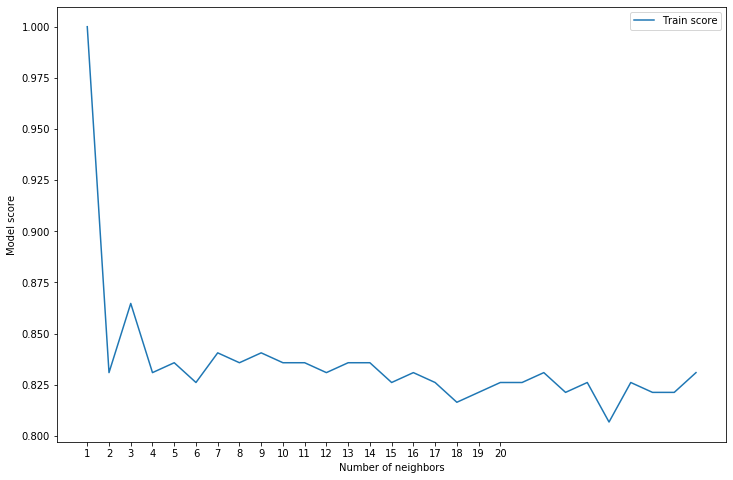

In [46]:
plt.figure(figsize=(12, 8))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

In [47]:
knn_clf = KNeighborsClassifier(n_neighbors=27)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 82.13%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.793651   0.864198  0.821256    0.828924      0.826368
recall       0.900901   0.729167  0.821256    0.815034      0.821256
f1-score     0.843882   0.790960  0.821256    0.817421      0.819339
support    111.000000  96.000000  0.821256  207.000000    207.000000
_______________________________________________
Confusion Matrix: 
 [[100  11]
 [ 26  70]]

Test Result:
Accuracy Score: 84.44%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.807018   0.909091  0.844444   0.858054      0.853518
recall      0.938776   0.731707  0.844444   0.835241      0.844444
f1-score    0.867925   0.810811  0.844444   0.839368      0.841906
support    49.000000  41.000000  0.844444  90.000000     90.000000
_____________

In [48]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,85.990338,88.888889
1,Tuned K-nearest neighbors,82.125604,84.444444


#### Support Vector Machine Hyperparameter Tuning

In [49]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 147 candidates, totalling 735 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s


Best params: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Train Result:
Accuracy Score: 85.51%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.824000   0.902439  0.855072    0.863220      0.860378
recall       0.927928   0.770833  0.855072    0.849381      0.855072
f1-score     0.872881   0.831461  0.855072    0.852171      0.853672
support    111.000000  96.000000  0.855072  207.000000    207.000000
_______________________________________________
Confusion Matrix: 
 [[103   8]
 [ 22  74]]

Test Result:
Accuracy Score: 90.00%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.884615   0.921053       0.9   0.902834      0.901215
recall      0.938776   0.853659       0.9   0.896217      0.900000
f1-score    0.910891   0.886076       0.9   0.898484      0.899586
support    49.000000  41.0

[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 720 out of 735 | elapsed:    3.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 735 out of 735 | elapsed:    3.5s finished


In [50]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,85.990338,88.888889
1,Tuned K-nearest neighbors,82.125604,84.444444
2,Tuned Support Vector Machine,85.507246,90.000000


#### Decision Tree Classifier Hyperparameter Tuning

In [51]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, iid=True)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 3824 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 11824 tasks      | elapsed:   10.0s


Best_params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 2, 'splitter': 'random'}
Train Result:
Accuracy Score: 85.99%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.866071   0.852632  0.859903    0.859352      0.859838
recall       0.873874   0.843750  0.859903    0.858812      0.859903
f1-score     0.869955   0.848168  0.859903    0.859061      0.859851
support    111.000000  96.000000  0.859903  207.000000    207.000000
_______________________________________________
Confusion Matrix: 
 [[97 14]
 [15 81]]

Test Result:
Accuracy Score: 75.56%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.813953   0.702128  0.755556   0.758041      0.763011
recall      0.714286   0.804878  0.755556   0.759582      0.755556
f1-score    0.760870   0.750000

[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:   10.9s finished
/Users/yungreezy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [52]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,85.990338,88.888889
1,Tuned K-nearest neighbors,82.125604,84.444444
2,Tuned Support Vector Machine,85.507246,90.000000
3,Tuned Decision Tree Classifier,85.990338,75.555556


#### Random Forest Classifier Hyperparameter Tuning

In [53]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 45.8min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 53.6min
[Parallel(n_jobs=-1)]: Done 9097 tasks      | e

Best parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 800}
Train Result:
Accuracy Score: 98.07%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.981982   0.979167  0.980676    0.980574      0.980676
recall       0.981982   0.979167  0.980676    0.980574      0.980676
f1-score     0.981982   0.979167  0.980676    0.980574      0.980676
support    111.000000  96.000000  0.980676  207.000000    207.000000
_______________________________________________
Confusion Matrix: 
 [[109   2]
 [  2  94]]

Test Result:
Accuracy Score: 87.78%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.880000   0.875000  0.877778   0.877500      0.877722
recall      0.897959   0.853659  0.877778   0.875809      0.877778
f

In [54]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,85.990338,88.888889
1,Tuned K-nearest neighbors,82.125604,84.444444
2,Tuned Support Vector Machine,85.507246,90.000000
3,Tuned Decision Tree Classifier,85.990338,75.555556
4,Tuned Random Forest Classifier,98.067633,87.777778


In [55]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
base_score = [0.25, 0.5, 0.75, 0.99]
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]

params_grid = {
    'n_estimators': n_estimators, 'max_depth': max_depth,
    'learning_rate' : learning_rate, 'min_child_weight' : min_child_weight, 
    'booster' : booster, 'base_score' : base_score
                      }

xgb_clf = XGBClassifier()

xgb_cv = GridSearchCV(xgb_clf, params_grid, cv=3, scoring = 'accuracy',n_jobs =-1, verbose=1)


xgb_cv.fit(X_train, y_train)
best_params = xgb_cv.best_params_
print(f"Best paramters: {best_params}")

xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 3200 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 54.2min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 60.1min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 68.1min
[Parallel(n_jobs=-1)]: Done 9600 out of 9600 | elapsed: 73.9min finished
/Users/yungreezy/anaconda3/lib/pytho

[19:54:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:547: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:54:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1043: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best paramters: {'base_score': 0.25, 'booster': 'gblinear', 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 100}
[19:54:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:547: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only u

In [56]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,85.990338,88.888889
1,Tuned K-nearest neighbors,82.125604,84.444444
2,Tuned Support Vector Machine,85.507246,90.000000
3,Tuned Decision Tree Classifier,85.990338,75.555556
4,Tuned Random Forest Classifier,98.067633,87.777778
5,Tuned XGBoost Classifier,85.507246,85.555556


In [57]:
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.990338,87.777778
1,K-nearest neighbors,83.574879,88.888889
2,Support Vector Machine,92.753623,90.000000
3,Decision Tree Classifier,100.000000,70.000000
4,Random Forest Classifier,100.000000,87.777778
5,XGBoost Classifier,100.000000,81.111111


Hyperparameter tuning does not seem to have a signinficant effect of the results, this is likely due to the small size of the dataset.

## Feature Importance According to Random Forest

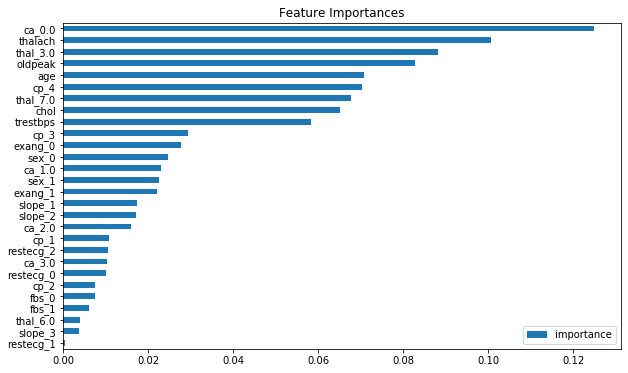

In [72]:
# Bar plot for feature importances 
feature_importances = pd.DataFrame(rf_clf.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)

N = 30
ax = (feature_importances.iloc[0:N][::-1]
    .plot(kind='barh',
          title='Feature Importances',
          figsize=(10, 6)))
ax.grid(False, axis='y')